#HW2

In [ ]:

# import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Problem 01

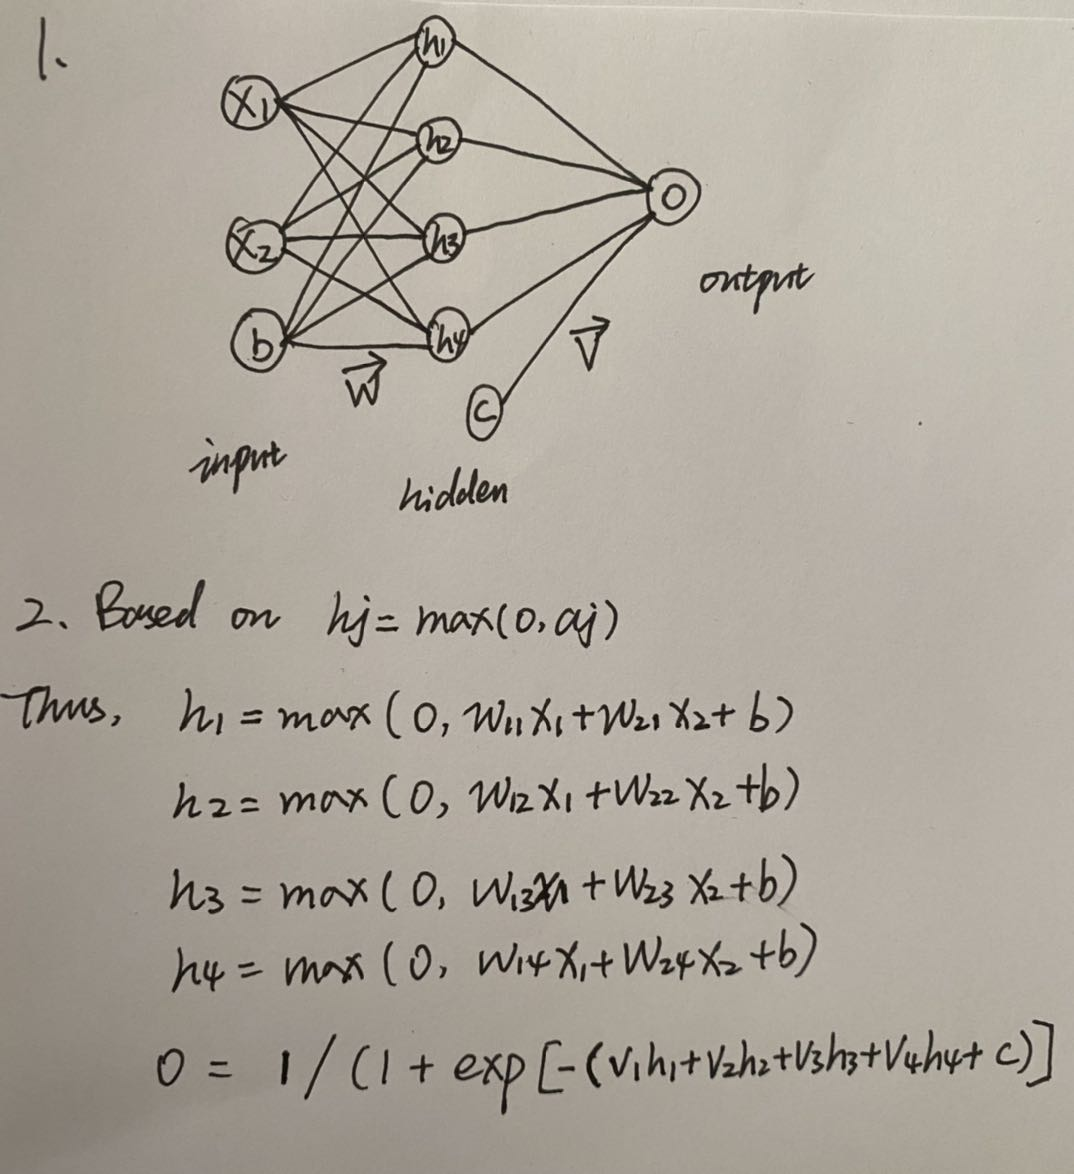

In [ ]:
# Write out the forward-pass function in python, call it ff nn ReLu(...)
def relu(z):
  return np.maximum(0,z)

def sigmoid(z):
  return 1/(1 + np.exp(-z))

def ff_nn_ReLu(X,W,b,V,c):
  _ = relu((np.array(X)@np.array(W))+b)
  result = sigmoid(np.dot(_, np.array(V))+c)
  return result

In [ ]:
X = [[1,-1], [0,-1], [0, 1]]
W = [[1, -1, 0, 1], [0, 0, 0.5, 1]]
b = [0, 0, 1, 0]
V = [1, 0, -1, 1]
c = [1]

ff_nn_ReLu(X,W,b,V,c)

array([0.81757448, 0.62245933, 0.62245933])

The class probabilities of each sample are 0.82, 0.62, 0.62.

## Problem 02

1.\
f_x = -3x^2 + 100x - 200y^2 \
f_y = 800y^3 - 400xy

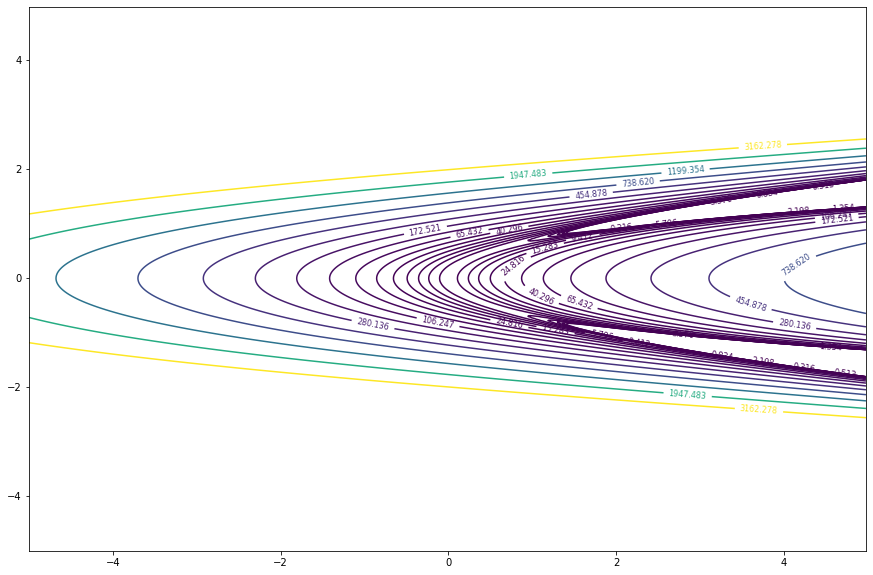

In [ ]:

# Create a visualization of the contours of this function
x_range = np.arange(-5,5,0.025)
y_range = np.arange(-5,5,0.025)
X,Y = np.meshgrid(x_range,y_range)
f = (3-X**3)+ 50*(2*Y**2 - X)**2
fig = plt.figure(figsize=(15,10))
ax = plt.subplot()
c = ax.contour(X,Y,f, np.logspace(-0.5, 3.5, 20, base=10))
ax.clabel(c, inline=True, fontsize = 8)
plt.show()

In [ ]:
# Write a Gradient Descent algorithm for finding the minimum of the function.
# Visualize your results with a few different learning rates
def fun(vector):
  x,y = vector
  return (3-x**3)+ 50*(2*y**2 - x)**2

def grad_f(vector):
  x,y = vector
  df_dx = -3*x**2 + 100*x -200*y**2
  df_dy = 800*y**3 - 400*x*y
  return np.array([df_dx, df_dy])

def minimum(vector, iterations, learning_rate):
  z = fun(vector)
  res = [vector]
  t = 0
  while t < iterations:
    v_new = vector - learning_rate * grad_f(vector)
    z_new = fun(v_new)
    if z_new>z:
      print('Iteration {} returns the minimal as {}.'.format(t, vector))
      break

    vector = v_new
    z = z_new
    res.append(vector)
    t += 1

  print('The minimal is at {}, and after {} iterations'.format(vector, t))
  return res 


In [ ]:
# gradient descenet visualization
def vis(iterations, learning_rate, trajectory):
  x_range = np.arange(-5,5,0.025)
  y_range = np.arange(-5,5,0.025)
  X,Y = np.meshgrid(x_range,y_range)
  f = (3-X**3)+ 50*(2*Y**2 - X)**2
  fig = plt.figure(figsize=(15,10))
  ax = plt.subplot()
  c = ax.contour(X,Y,f, np.logspace(-0.5, 3.5, 20, base=10))
  ax.clabel(c, inline=True, fontsize = 8)
  x = [X[0] for X in trajectory]
  y = [X[1] for X in trajectory]
  plt.plot(x,y, '-o', color='red')
  x_min = np.round(x[len(x) - 1], 4)
  y_min = np.round(x[len(x) - 1], 4)
  ax.annotate("minimum at ("+str(x_min)+','+str(y_min)+").", xy = (x_min, y_min+3), color = 'green')
  plt.show()

Learning Rate = 0.001

The minimal is at [-7.09346139e-05  1.23228969e-08], and after 100 iterations


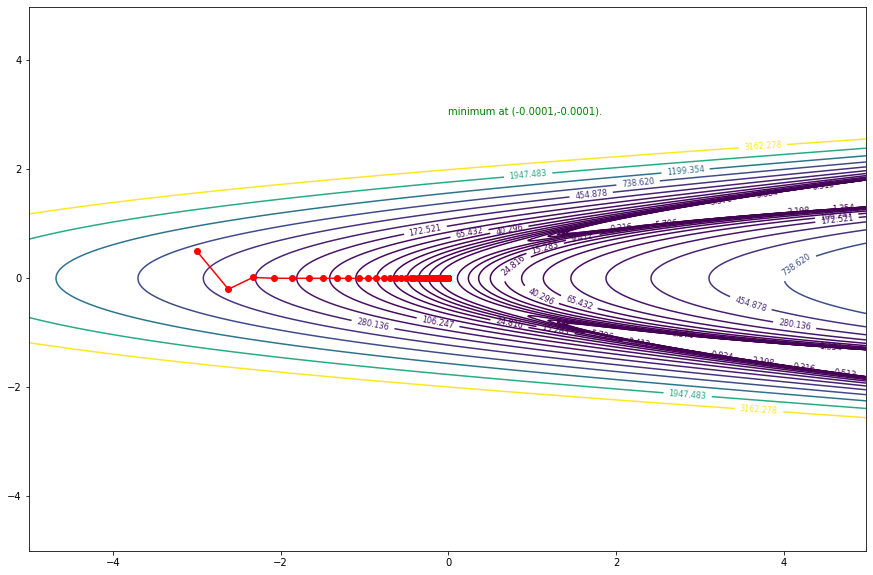

In [ ]:
# learning rate = 0.001 (iteration = 100, initial point (-3,0.5))
vis(100,0.001,minimum(np.array([-3,0.5]), 100, 0.001))

Learning Rate = 0.0005

The minimal is at [-1.60823201e-02  3.87988390e-07], and after 100 iterations


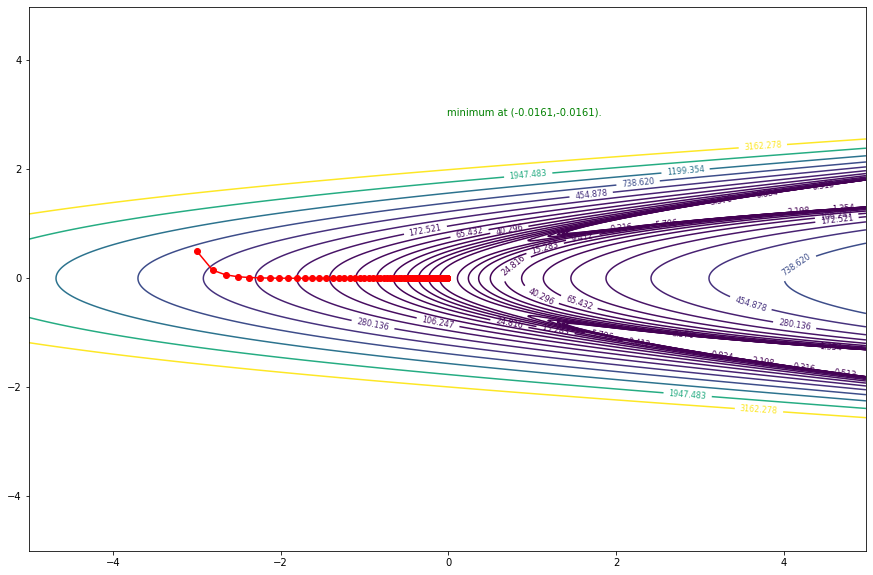

In [ ]:
# learning rate = 0.0005 (iteration = 100, initial point (-3,0.5))
vis(100,0.0005,minimum(np.array([-3,0.5]), 100, 0.0005))

Learning Rate = 0.0001

The minimal is at [-1.03089350e+00  2.13477018e-04], and after 100 iterations


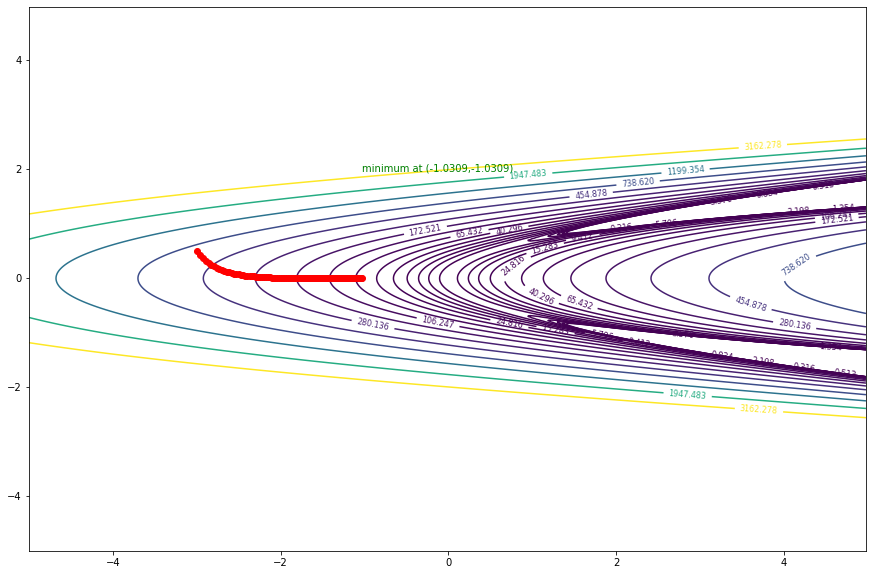

In [ ]:
# learning rate = 0.0001 (iteration = 100, initial point (-3,0.5))
vis(100,0.0001,minimum(np.array([-3,0.5]), 100, 0.0001))

In [ ]:
# Write a Gradient Descent With Momentum algorithm for finding the minimum. 
# Visualize your results with a few different settings of the algorithm’s
# hyperparameters.

def gradient_descent_momentum(start_point, iterations, learning_rate, alpha, v):
    current_point = start_point
    track = [current_point]
    velocity = v
    for i in range(iterations):
        cur_grad = grad_f(current_point)
        if (abs(cur_grad[0] < 0.001 and abs(cur_grad[1]) < 0.001)):
            return np.array(track)
        velocity = alpha * velocity - learning_rate * cur_grad     
        current_point = current_point + velocity
        track.append(current_point)    
    return np.array(track)

Alpha = 0.5, Learning Rate = 0.001

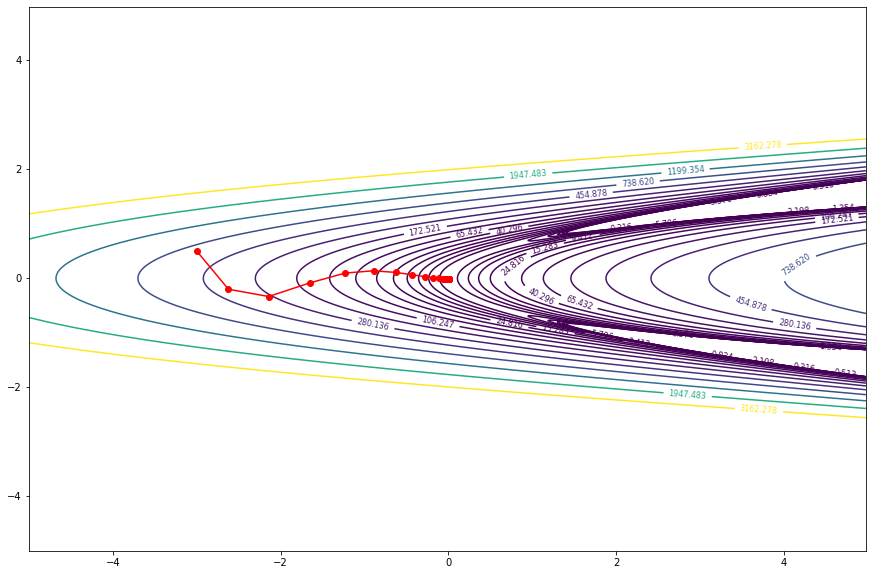

In [ ]:
traj = gradient_descent_momentum(iterations=100, learning_rate=0.001, start_point=[-3,0.5], alpha = 0.5, v = np.array([0,0]))

fig = plt.figure(figsize=(15,10))
ax = plt.subplot()
c = ax.contour(X,Y,f, np.logspace(-0.5, 3.5, 20, base=10))
ax.clabel(c, inline=True, fontsize = 8)
x = traj[:,0]
y = traj[:,1]
plt.plot(x,y, '-o', color='red')
plt.show()

Alpha = 0.5, Learning Rate = 0.0001

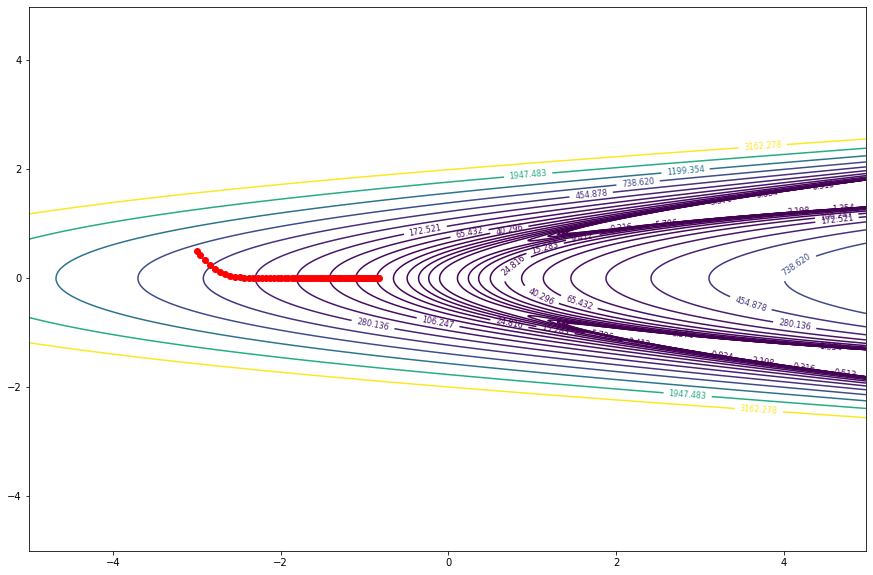

In [ ]:
traj = gradient_descent_momentum(iterations=100, learning_rate=0.0001, start_point=[-3,0.5], alpha = 0.5, v = np.array([0,0]))

fig = plt.figure(figsize=(15,10))
ax = plt.subplot()
c = ax.contour(X,Y,f, np.logspace(-0.5, 3.5, 20, base=10))
ax.clabel(c, inline=True, fontsize = 8)
x = traj[:,0]
y = traj[:,1]
plt.plot(x,y, '-o', color='red')
plt.show()

Alpha = 0.1, Learning Rate = 0.001

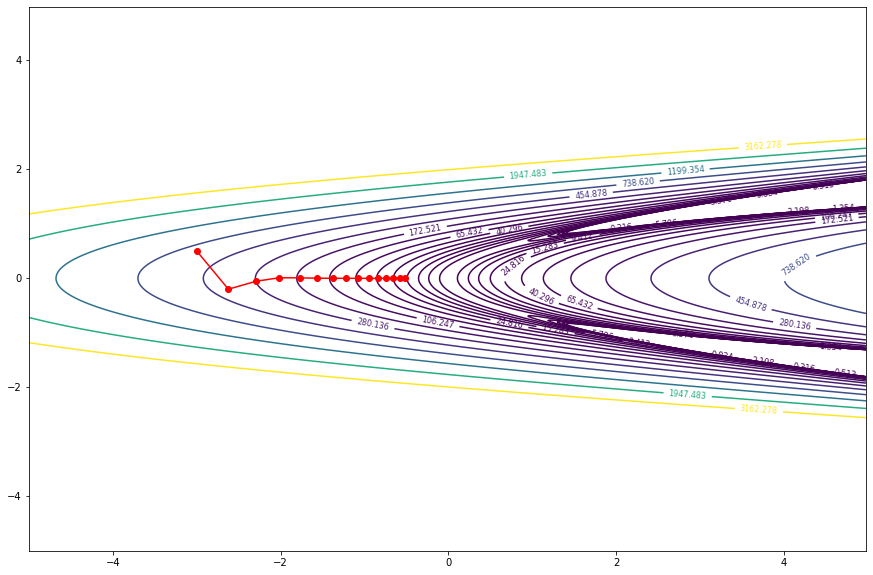

In [ ]:
traj = gradient_descent_momentum(iterations=100, learning_rate=0.001, start_point=[-3,0.5], alpha = 0.1, v = np.array([0,0]))

fig = plt.figure(figsize=(15,10))
ax = plt.subplot()
c = ax.contour(X,Y,f, np.logspace(-0.5, 3.5, 20, base=10))
ax.clabel(c, inline=True, fontsize = 8)
x = traj[:,0]
y = traj[:,1]
plt.plot(x,y, '-o', color='red')
plt.show()

## Problem 3

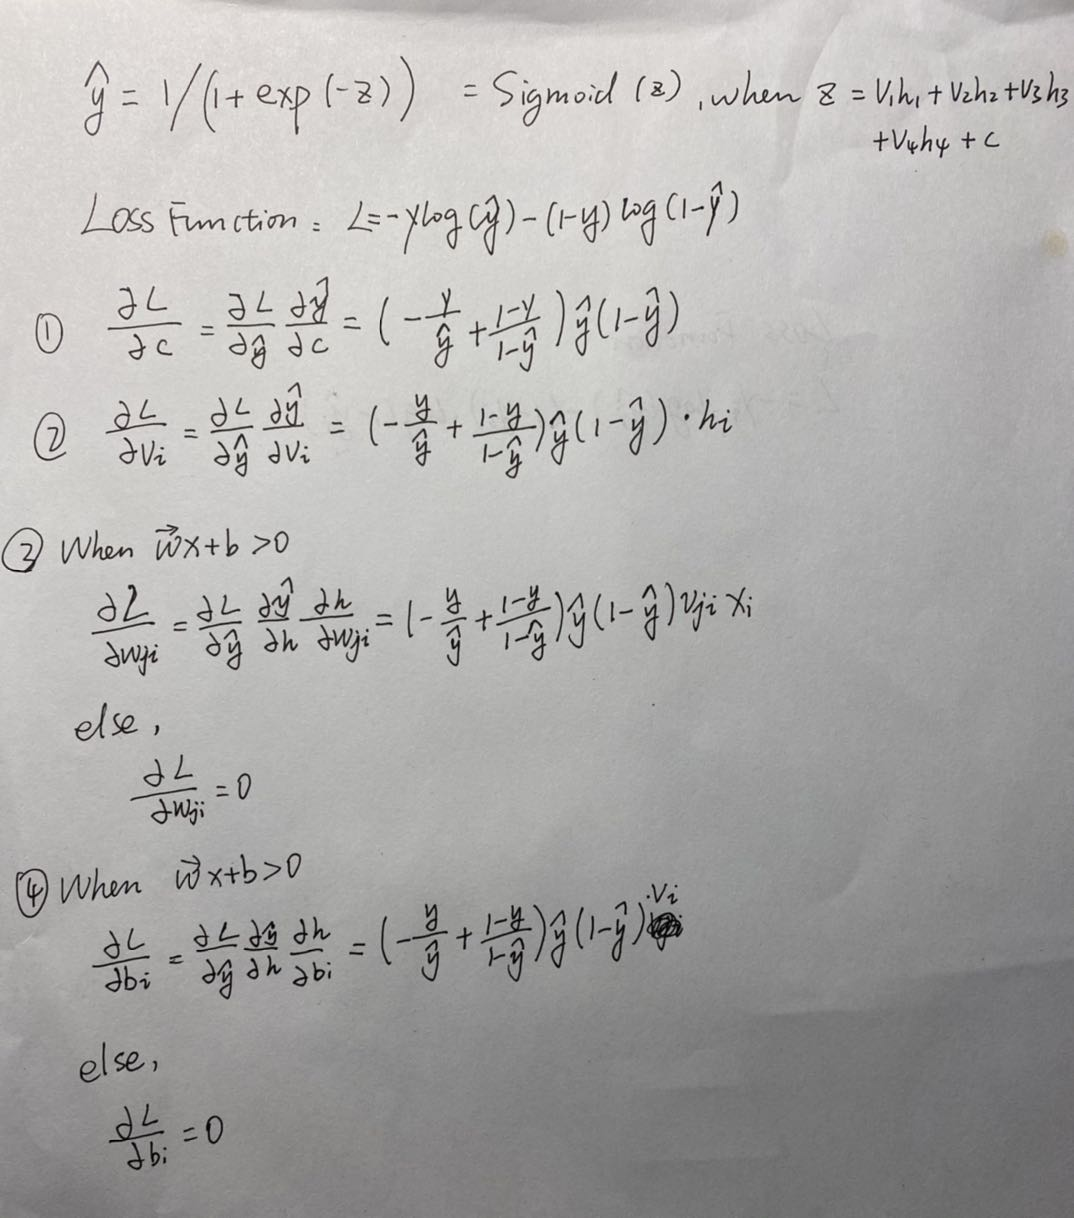

In [ ]:
# Write a function grad f(...) that takes in a weights vector and returns
# the gradient of the Loss at that location.


def grad_f(x, y, y_hat, w, b, v, c):
    loss_y_hat = (y/y_hat - (1-y)/(1-y_hat))
    h = relu(np.dot(np.array(x), np.array(w))+b)
    
    dw = x.T.dot(np.expand_dims((loss_y_hat * y_hat*(1-y_hat)),1).dot(np.expand_dims(v,1).T))
    db = (loss_y_hat* y_hat*(1-y_hat)).T.dot(np.where(h<=0,0,1))*v
    
    dv = (loss_y_hat* y_hat*(1-y_hat)).T.dot(h)
    dc = loss_y_hat.dot(y_hat*(1-y_hat))
    
    return np.array([dw,db,dv,dc])/len(y)

In [ ]:
x = np.array([[1,-1], [0,-1], [0, 1]])
w = np.array([[1, -1, 0, 1], [0, 0, 0.5, 1]])
b = np.array([0, 0, 1, 0])
v = np.array([1, 0, -1, 1])
c = [1]
y_pred = ff_nn_ReLu(x,w,b,v,c)

grad_f(x, np.array([1,1,1]), y_pred, w, b, v, c)

array([array([[ 0.06080851,  0.        , -0.06080851,  0.06080851],
       [-0.06080851,  0.        ,  0.06080851, -0.06080851]]),
       array([ 0.06080851,  0.        , -0.31250229,  0.12584689]),
       array([0.06080851, 0.        , 0.28209803, 0.12584689]),
       0.3125022871342158], dtype=object)

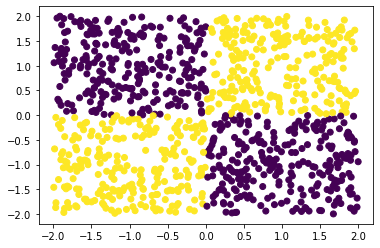

In [ ]:
# Generate a synthetic dataset like the XOR pattern (see below)
x=4*np.random.rand(1000,2)-2
y=np.zeros(1000)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1], c=y)
plt.show()

In [ ]:
# Fit your network using Gradient Descent. 
# Keep track of the total Loss at each iteration and plot the result.
    
# binary cross entropy loss function
def loss(y, y_hat):
  return  np.sum(-(y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))

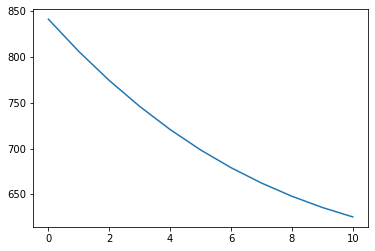

In [ ]:
# gradient descent
def grad_descent(x, y_true, w, b, v, c, iterations=10, learning_rate=0.1):
  # a  
  y_pred = ff_nn_ReLu(x,w,b,v,c)
  losses = [loss(y_true, y_pred)]
  for i in range(iterations):
    dw,db,dv,dc = grad_f(x, y_true, y_pred, w, b, v, c)
    w = w+learning_rate*dw
    b = b+learning_rate*db
    v = v+learning_rate*dv
    c = c+learning_rate*dc
    y_pred = ff_nn_ReLu(x,w,b,v,c)
    l = loss(y_true, y_pred)
    losses.append(l)
  return losses

losses = grad_descent(x,y,w,b,v,c, iterations=10, learning_rate=0.1)
plt.plot(losses)

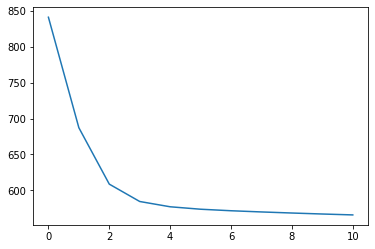

In [ ]:
# Repeat the exercise above using Momentum. Comment on whether your
# algorithm seems to converge more efficiently
def grad_descent_w_momentum(x, y_true, w, b, v, c, iterations=10, alpha=0.1, epsilon=0.5):  
    y_pred = ff_nn_ReLu(x,w,b,v,c)
    losses = [loss(y_true, y_pred)]
    vw = np.zeros(w.shape)
    vb = np.zeros(b.shape)
    vv = np.zeros(v.shape)
    vc = 0
    for i in range(iterations):
        dw,db,dv,dc = grad_f(x, y_true, y_pred, w, b, v, c)
        vw = alpha*vw - epsilon*dw
        vb = alpha*vb - epsilon*db
        vv = alpha*vv - epsilon*dv
        vc = alpha*vc - epsilon*dc
        w = w-vw
        b = b-vb
        v = v-vv
        c = c-vc
        y_pred = ff_nn_ReLu(x,w,b,v,c)
        l = loss(y_true, y_pred)
        losses.append(l)
    return np.array([w,b,v,c]), losses

array_w_m, losses=  grad_descent_w_momentum(x, y, w, b, v, c)
plt.plot(losses)

As we can see, as the iteration goes on, the loss decreases faster than which without momentum. Thus, the algorithm converges more efficiently.

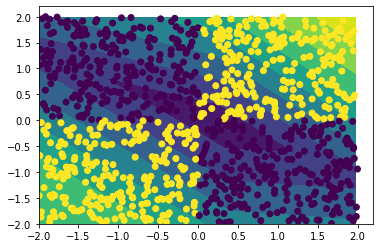

In [ ]:
# Plot a visualization of the final decision boundary that your model has learned. 
# Overlay the datapoints in this plot.
x1 = np.arange(-2.0, 2.0, 0.025)
x2 = np.arange(-2.0, 2.0, 0.025)
X1, X2 = np.meshgrid(x1, x2)
predict = ff_nn_ReLu(np.array((X1.ravel(),X2.ravel())).T,array_w_m[0],array_w_m[1],
                     array_w_m[2],array_w_m[3]).reshape((160,160))
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, predict)
plt.scatter(x[:,0],x[:,1],c=y)